In [1]:
%matplotlib inline


Sequence comparison of bacterial luciferases
============================================

.. currentmodule:: biotite.sequence.align

This script creates a multiple sequence alignment of the bacterial
luciferase gene *luxA* using the :func:`align_multiple()` function
provided by *Biotite*.


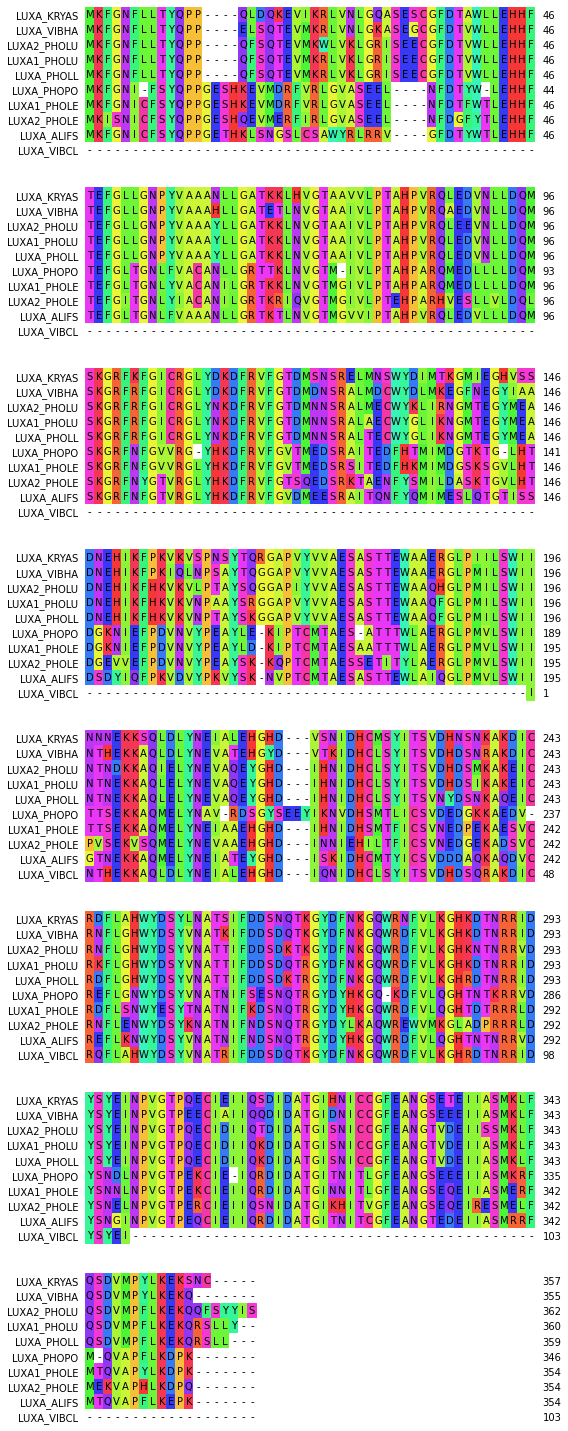

In [2]:
# Code source: Patrick Kunzmann
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.database.entrez as entrez


# Search for protein products of LexA gene in UniProtKB/Swiss-Prot database
query =   entrez.SimpleQuery("luxA", "Gene Name") \
        & entrez.SimpleQuery("srcdb_swiss-prot", "Properties")
uids = entrez.search(query, db_name="protein")
fasta_file = fasta.FastaFile.read(entrez.fetch_single_file(
    uids, None, db_name="protein", ret_type="fasta"
))

ids = []
sequences = []
for header, seq_str in fasta_file.items():
    # Extract the UniProt Entry name from header
    identifier = header.split("|")[-1].split()[0]
    ids.append(identifier)
    sequences.append(seq.ProteinSequence(seq_str))

matrix = align.SubstitutionMatrix.std_protein_matrix()
alignment, order, tree, distances = align.align_multiple(
    sequences, matrix, gap_penalty=(-10,-1), terminal_penalty=False
)
# Order alignment according to the guide tree
alignment = alignment[:, order]
ids = [ids[i] for i in order]

fig = plt.figure(figsize=(8.0, 20.0))
ax = fig.add_subplot(111)
graphics.plot_alignment_type_based(
    ax, alignment, labels=ids, show_numbers=True, spacing=2.0
)
fig.tight_layout()

plt.show()